# Simply Cluster : An Introduction to KMeans Clustering


    This notebook is a simple tutorial on KMeans Clustering and steps to find optimum k values for KMeans Clustering using Elbow method.

    It contains:

        Simple Data Loading and Preprocessing : In our case we will be using Iris Dataset.
        KMeans Clustering implementation 
        Searching k's optimum value via Elbow Diagram.


## Data Loading and Preprocessing

In [1]:
# Import the libraries requried
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv').drop(columns=['Id']) # Load the iris dataset

In [3]:
# Simple mapping to Clustering the species
df['Species'] = df['Species'].map(
    {
        'Iris-setosa' : 0,
        'Iris-versicolor' : 1,
        'Iris-virginica' : 2
    }
)

In [4]:
df # Check whether data is in desired format or not.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
df.info() # Quick summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# We do this as numpy is more flexible than dataframes.
X = df.iloc[:,:].values # To convert the dataframe to a numpy array

## Model Training and Elbow Diagram of Within-Cluster Sum of Squares

In [ ]:
# Import the KMeans from cluster module
from sklearn.cluster import KMeans
# From this point we could go on and experiment different k values manually but tha would be simply waste of time.
# This is why we directly jump in to Elbow method .

In [8]:
# WCSS stands for Within-Cluster Sum of Squares
#  It is calculated by summing the squared distance between each data point and the centroid of the cluster to which it belongs.
# We are gonna store the wcss of some cluster points and use these to find the optimal number of cluster using the elbow diagram.
wcss = []

In [9]:
# Run a for loop from 1 to n(typically values between 1 and 25) to store the wcss value for the elbow diagram.
for x in range(1,15):
    k_m = KMeans(n_clusters=x)
    k_m.fit_predict(df)
    wcss.append(k_m.inertia_)

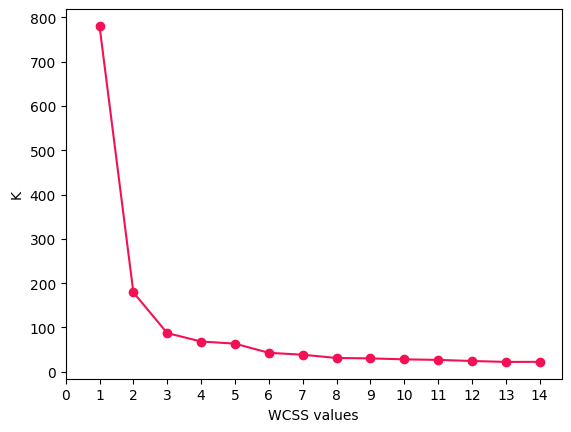

In [ ]:
# The elbow diagram is used to find the elbow or the the second degree derivative where the graph changes drastically before entering 
# a stable state. We can use this to calculate the k value for the KMeans which help us to determine the optimal number of cluster for 
# our analysis.
plt.plot(
    range(1,15), # The x axis is the range(same as give in for loop)
    wcss ,# The wcss values for the k values respectively.
    marker = 'o', # The marker is set for better visualization
    color = "#F31155" # Pick your favourite color here.
)
plt.xlabel('WCSS values')
plt.ylabel('K')
plt.xticks([x for x in range(15)]) # Same as the range of for loop
plt.show()

In [27]:
# Therefore the optimum value of k is 3 as we can see in the graph

In [28]:
km = KMeans(n_clusters=3) # Now Instantiate the model with the perfect k

In [29]:
labels = km.fit_predict(X) # Fit predict values as we are now dealing with Unsupervised learning models 
# Also this takes one parameter and the output is actually the predicted labels.

In [30]:
labels # The predicted labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Visualizing data in 2D and 3D

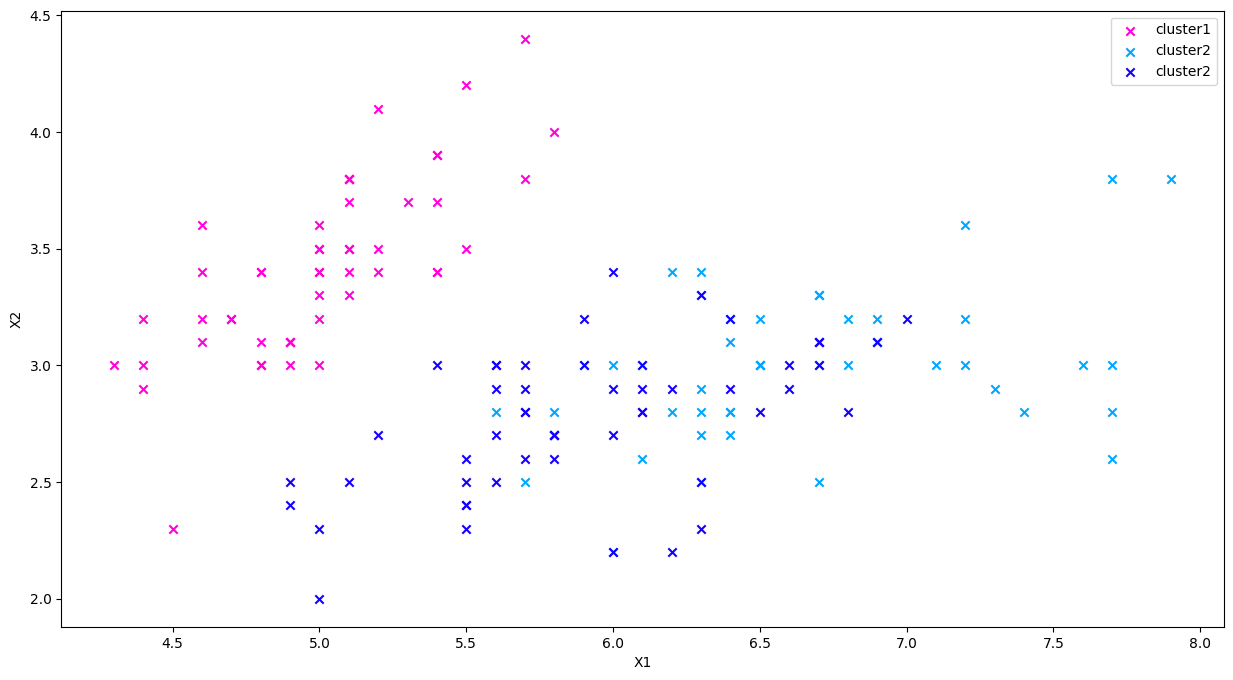

In [89]:
# Now we will plot this labels using an interesting hack .
# syntax : plt.scatter(
#                       x = X[labels == comparing_labels , column_no1]
#                       y = X[labels == comparing_labels , column_no2]
#                       # If more variables(columns) we can use shape and marker style also.
#                       )
plt.figure(figsize=(15,8))
plt.scatter(X[labels == 0,0],X[labels == 0,1],color="#FF00D9",label='cluster1',marker='x')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color="#00A6FF",label='cluster2',marker='x')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color="#1500FF",label='cluster2',marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [94]:
import plotly.express as px
fig = px.scatter_3d(
                    x=X[:,0],
                    y=X[:,1],
                    z=X[:,2],
                    color = labels
                    )
fig.show()

In [33]:
# For N dimensional data we can use PCA for visualization.

KMeans clustering is a simple unsupervised clustering algorithm that can be used to cluster simple clusters with no symmetric 
curves or density based points.It is a good choice if we have a simple dataset without any curves and patterns followed.
The main disadvantage of this algorithm is that we have to set the number of clusters , which may be computational costly and time consuming if done for a huge dataset.Another major failure is that this algorithm fails to detect density based points which can be closer to each other forming clusters.To opt better results we can use other clustering algorithms like : AgglomerativeClustering , DBSCAN and OPTICS.

    Reference :
            CampusX's KMeans Clustering : https://www.youtube.com/playlist?list=PLKnIA16_RmvbA_hYXlRgdCg9bn8ZQK2z9
            For Mathematical Understanding : https://www.youtube.com/playlist?list=PL4gu8xQu0_5KiYnRlueicckEmpFAiRD5Y